# Run DataRepresentationBuilder main.py 


### Apply Model to External Dataset 


In [1]:
from main import DataRepresentationBuilder

import glob
trouble_shooting_datasets = glob.glob('new_input_data/for_troubleshooting_and_testing/*')
trouble_shooting_datasets = [x for x in trouble_shooting_datasets if '_external_sirna' in x]
trouble_shooting_datasets


['new_input_data/for_troubleshooting_and_testing/shuffled-expression_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024_3157.csv',
 'new_input_data/for_troubleshooting_and_testing/all-positive-labels_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv',
 'new_input_data/for_troubleshooting_and_testing/all-negative-labels_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv',
 'new_input_data/for_troubleshooting_and_testing/randomized-expression_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024_8371.csv',
 'new_input_data/for_troubleshooting_and_testing/original_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv',
 'new_input_data/for_troubleshooting_and_testing/randomized-sequences_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024_5353.csv',
 'new_input_data/for_troubleshooting_and_testing/shuffled-sequences_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024_3040.csv']

for_troubleshooting_and_testing/original_external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv



IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 1903 siRNAs
P3    1903
Name: chemical_scaffold, dtype: int64

bDNA    1903
Name: screen_type, dtype: int64

human    1903
Name: species, dtype:

Read 0M words
Number of words:  32194
Number of labels: 3
Progress: 100.0% words/sec/thread:  322556 lr:  0.000000 avg.loss:  1.102537 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		
240 	 54 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN58362
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN58362_h_p3_bDNA_oh-bowgenw-annftlab_norm_25-60-rm-u/
Created file for storing data processing parameter data for this and future runs: 
	 output_model_fitting/data-processing-param-index.csv
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN58362_h_p3_bDNA_oh-bowgenw-annftlab_norm_25


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 3 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 3 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-3_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 3 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 3 with encoding ann-fasttext-class-trained saved to: ~/

models/final_rf_model_rnd-3_annftlab.pickle



Predictions from final model saved to: ~/

data/predictions_final_models.csv



Predictions on External Dataset from final model saved to: ~/

data/predictions_final_models_ext_dataset.csv
Model Fittings complete!


Ploting precision-recall curves from Final Model Building...

Plotting precision-recall curves for final models...


Final Precision-Recall-Threshold curve data saved to: ~/data/final_performance_metrics_p-r_3-rnds.csv
Figure saved to: output_model_f

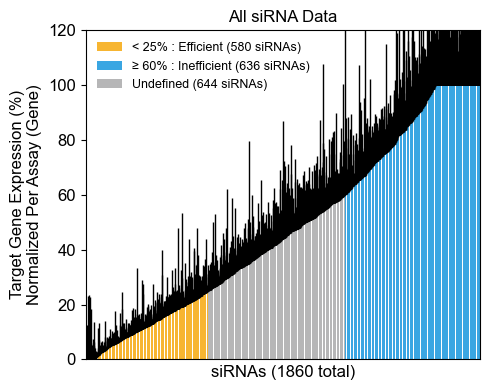

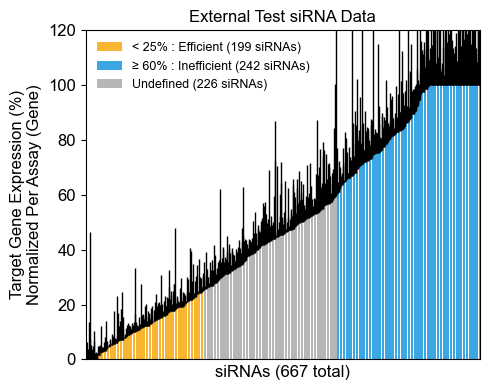

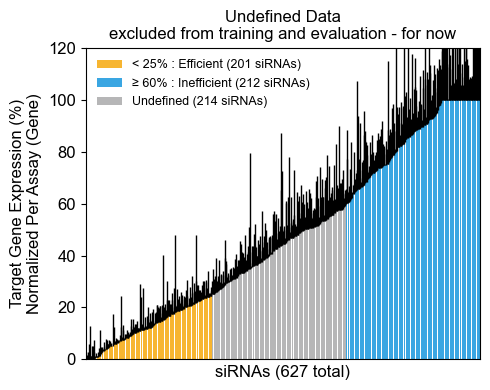

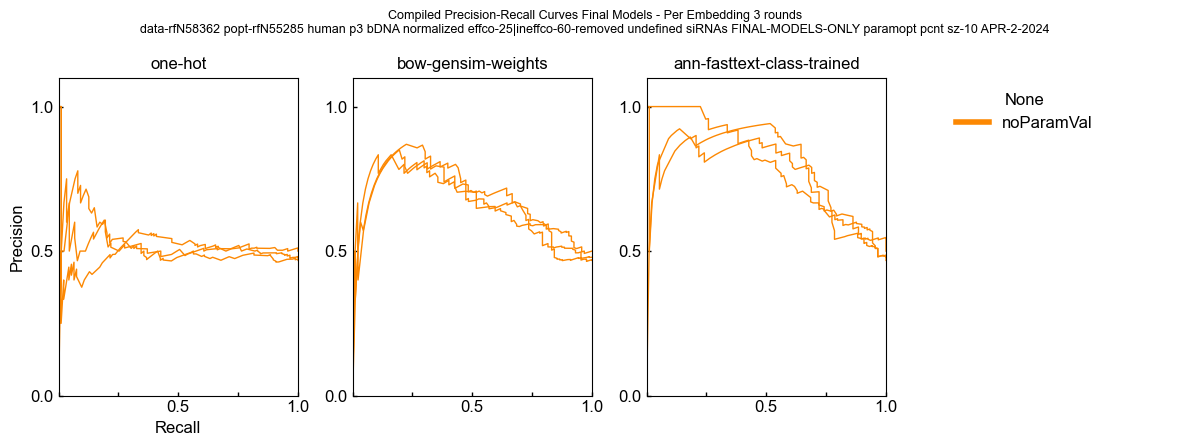

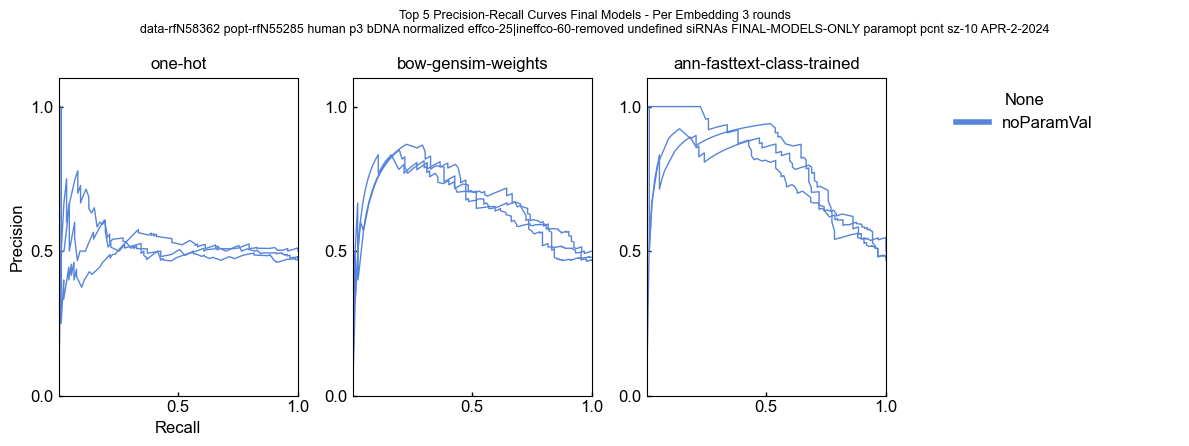

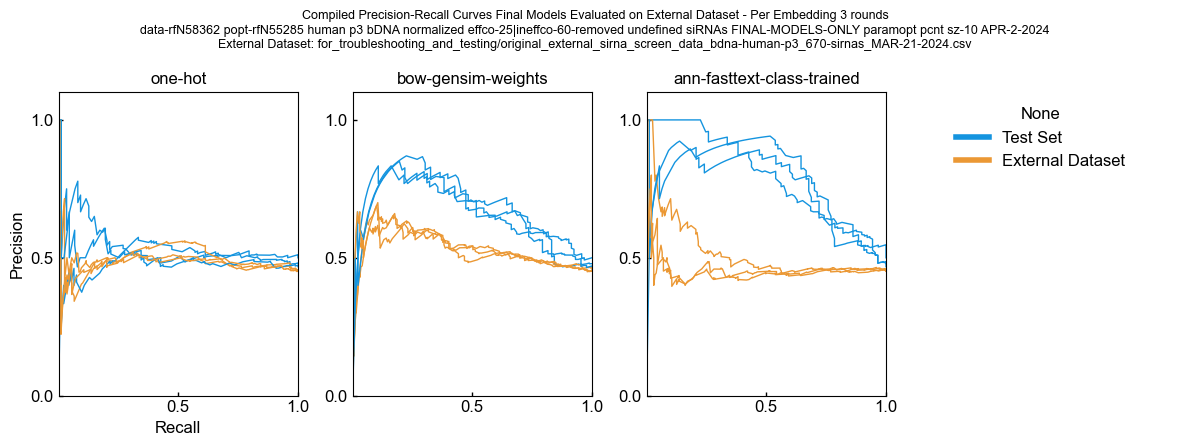

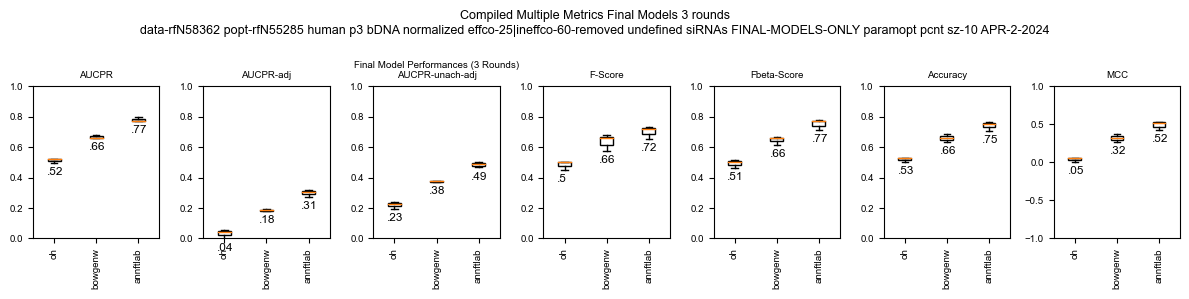

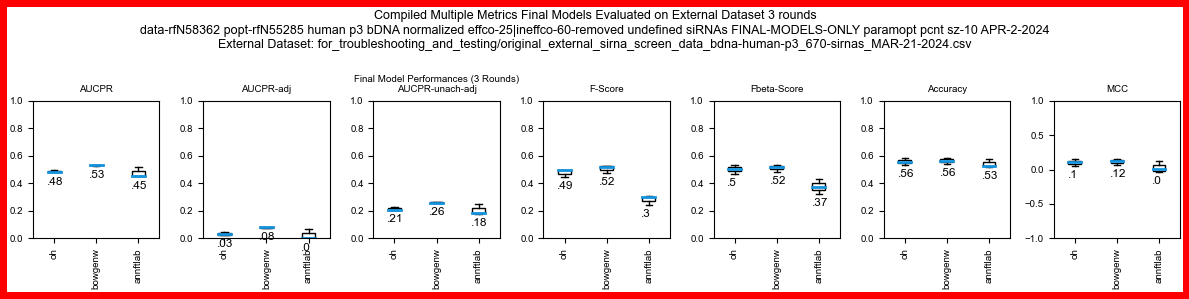

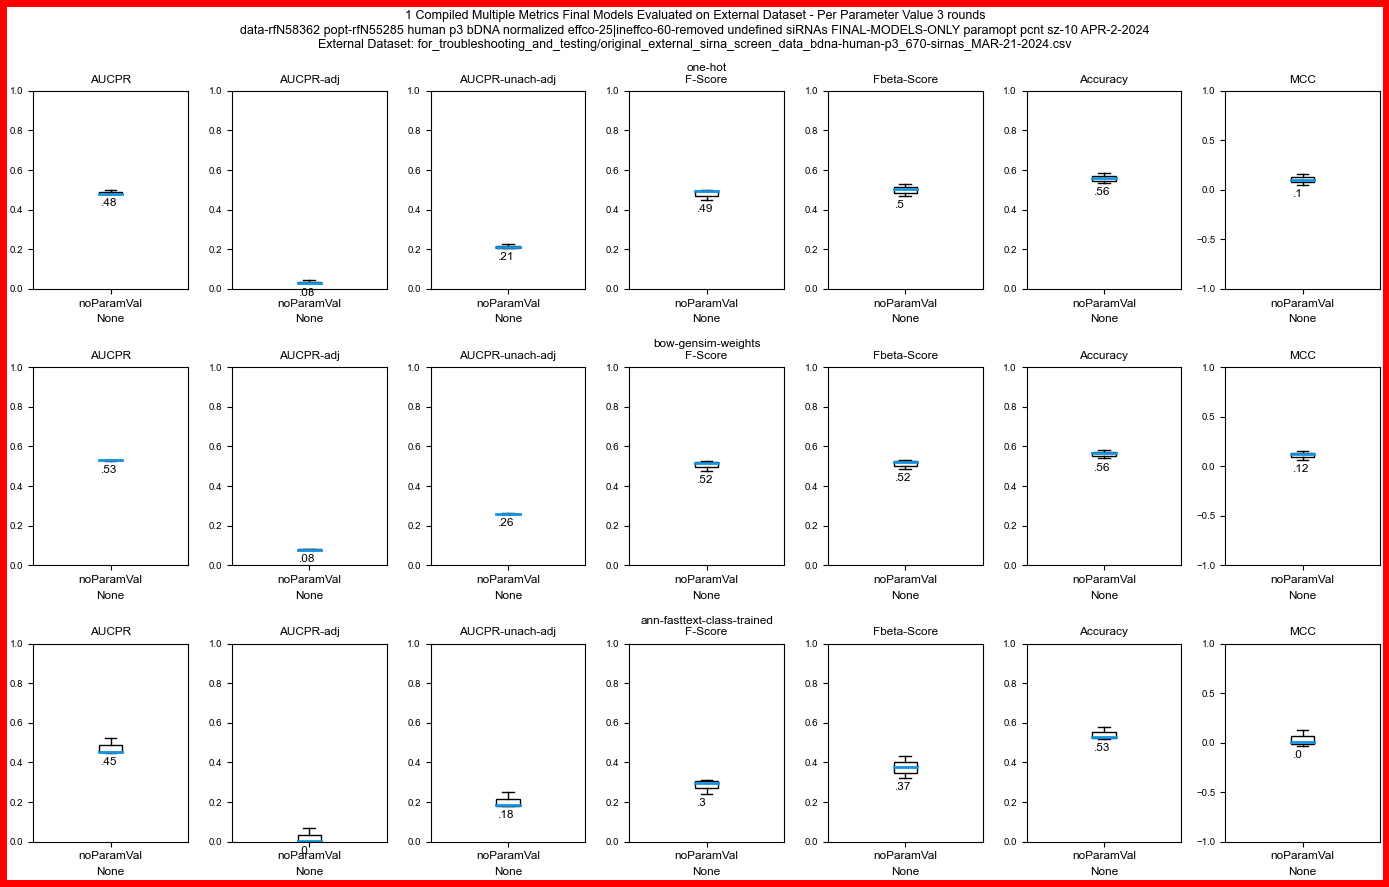

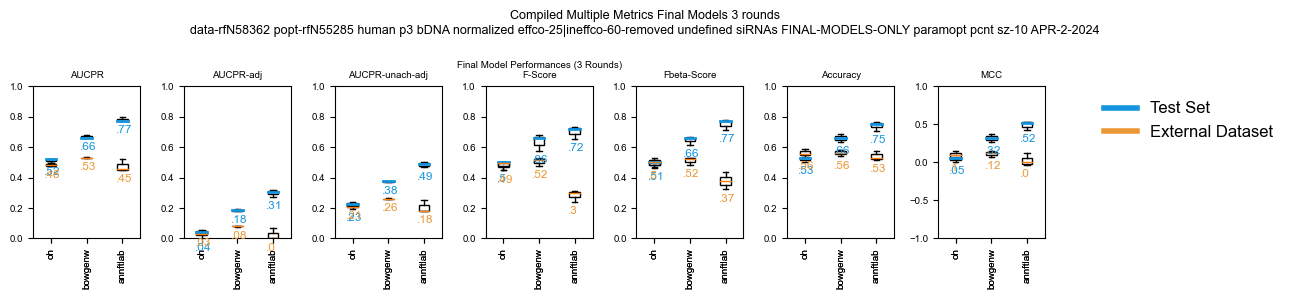

In [2]:

# for f in trouble_shooting_datasets:
#     #print(f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_newly')[0])
#     print('** '+f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_external_sirna')[0])

file_lab__ = 'original'
# file_lab__ = 'shuffled-sequences'
# file_lab__ = 'randomized-expression'
# file_lab__ = 'shuffled-expression'

ext_data_file = [x for x in trouble_shooting_datasets if file_lab__ in x][0].split('new_input_data/')[-1]
print(ext_data_file)


drb = DataRepresentationBuilder(
    model_type__='random-forest',
    
    parameter_to_optimize__='None',
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    # 20+20+20 = 60
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',

        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)

#         'ann-word2vec-gensim-cbow',
#         'ann-word2vec-gensim-skipgram',

#         'ann-fasttext-skipgram',
#         'ann-fasttext-cbow',

        'ann-fasttext-class-trained',

        # 'ann-word2vec-gensim', # OLD
        # 'bow-gensim-values', # WRONG

    ],

    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,

    apply_final_models_to_external_dataset__ = True,

    external_data_file__ = ext_data_file,
    
    input_data_dir__ = 'new_input_data/',
    input_data_file__ = 'training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv',
    
    
)

In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        'bow-gensim-values',
        #'bow-countvect',
        #'ann-word2vec-gensim',
    ],

    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,

    apply_final_models_to_external_dataset__ = True,
        
    external_data_file__ = ('for_troubleshooting_and_testing/'+
            'original_newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024.csv'),
)


In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'ann-word2vec-gensim',],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
        
    external_data_file__ = 'newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024.csv', # NO randomization of extenral data
)


### Apply Model to External Dataset *Shuffled 1*
 `'shuffled_newly_added_sirna_screen_data_777-sirnas|-bdna_FEB-22-2024_2485.csv'`

In [ ]:
from main import DataRepresentationBuilder


drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'bow-gensim-values',
#         'ann-word2vec-gensim',
    ],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
        
    external_data_file__ = 'shuffled_newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024_2776.csv',
)


### Apply Model to External Dataset *Shuffled 2*
 `'shuffled_newly_added_sirna_screen_data_777-sirnas|-bdna_FEB-22-2024_7020.csv'`

In [ ]:
from main import DataRepresentationBuilder


drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'ann-word2vec-gensim',],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
        
    external_data_file__ = 'shuffled_newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024_1145.csv',

)


### Apply Model to External Dataset *Randomized Expressions 1*
 `'randomized_sirna_screen_data_777-sirnas|-bdna_FEB-22-2024.csv'`

In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'ann-word2vec-gensim',],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
        
    external_data_file__ = 'randomized_newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024_4189.csv',  # Randomization of extenral data
)


### Apply Model to External Dataset *Randomized Sequences 1*
 `'randomized_sirna_screen_data_777-sirnas|-bdna_FEB-22-2024.csv'`

In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'ann-word2vec-gensim',],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
        
    external_data_file__ = 'randomized-sequences_newly_added_sirna_screen_data_765-sirnas|-bdna_MAR-13-2024_6738.csv', # NO randomization of extenral data
)



### Apply Model to External Dataset with different scaffolds 
 `'cleaned_no-bad-or-duplicate-screens_sirna_screen_data_4392sirnas-bdna-75-genes_JAN-29-2024.csv'`

In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__ = 'random-forest',
    parameter_to_optimize__ = 'None',
    custom_parameter_values_to_loop__ = [],
    num_rerurun_model_building__=3,

    kmer_size__=9,
    flank_len__=20,

    encoding_ls__ = [
        'one-hot',
        'bow-gensim-weights-times-values',
        'bow-gensim-weights',
        #'bow-countvect',
        'ann-word2vec-gensim',],


    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,


    apply_final_models_to_external_dataset__ = True,
    #randomize_ext_data__ = False, # Note used anymore (instead use external_data_file__)
    
    ext_species_ls__ = ['human'],
    ext_chemical_scaffold_ls__=['P5'],
        
    external_data_file__  = 'cleaned_no-bad-or-duplicate-screens_sirna_screen_data_4392sirnas-bdna-75-genes_JAN-29-2024.csv',  # NO randomization of extenral data
)



In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(model_type__ = 'random-forest',
                                parameter_to_optimize__ = 'None',
                                custom_parameter_values_to_loop__ = [],
                                num_rerurun_model_building__=10,
                                kmer_size__=9,
                                flank_len__=20,
                                encoding_ls__ = ['one-hot','bow-gensim-weights-times-values','bow-gensim-weights','bow-countvect','ann-word2vec-gensim',],#'ann-word2vec-gensim'],#['bow-countvect', 'one-hot'],
                                run_param_optimization__ = False,
                                use_existing_processed_dataset__ = False,
                                apply_final_models_to_external_dataset__ = True,
                                #ext_species_ls__ = ['human'],
                                #ext_chemical_scaffold_ls__=['P5'],
                                randomize_ext_data__ = False,

                                )

In [ ]:
from main import DataRepresentationBuilder

drb = DataRepresentationBuilder(model_type__ = 'random-forest',
                                parameter_to_optimize__ = 'None',
                                custom_parameter_values_to_loop__ = [],
                                num_rerurun_model_building__=10,
                                kmer_size__=9,
                                flank_len__=20,
                                encoding_ls__ = ['one-hot','bow-gensim-weights-times-values','bow-gensim-weights','bow-countvect','ann-word2vec-gensim',],#'ann-word2vec-gensim'],#['bow-countvect', 'one-hot'],
                                run_param_optimization__ = False,
                                use_existing_processed_dataset__ = False,
                                apply_final_models_to_external_dataset__ = True,
                                #ext_species_ls__ = ['human'],
                                #ext_chemical_scaffold_ls__=['P5'],
                                randomize_ext_data__ = True,
                                )



# Parameter Optimization

# Kmer Size
`Building parameter Optimization semi-sup`

`Selected kmer-size:`

In [ ]:
from main import DataRepresentationBuilder


########### kmer size

print("Starting run....\n\n")

drb = DataRepresentationBuilder(
    model_type__ = 'semi-sup-random-forest',
    run_param_optimization__ = True,
    num_rerurun_model_building__=25,

    parameter_to_optimize__ = 'kmer-size',
    custom_parameter_values_to_loop__ = [2,3,5,7,9,12,15,17,20],

    flank_len__=20,
    #window_size__= 5,
    #word_freq_cutoff__ = 5,
    encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values',
                     #'bow-countvect',
                     'ann-word2vec-gensim', 'ann-keras'],
    use_existing_processed_dataset__ = False,
    apply_final_models_to_external_dataset__ = False,
)
print("\n\n\n\nFINISHED RUNNING SEMI-SUP-RF KMER SIZE PARAMOPT!\n\n\n")

# drb = DataRepresentationBuilder(
#     model_type__ = 'semi-sup-svm',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,
#
#     parameter_to_optimize__ = 'kmer-size',
#     custom_parameter_values_to_loop__ = [2,3,5,7,9,12,15,17,20],
#
#     flank_len__=20,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )


# drb = DataRepresentationBuilder(
#     model_type__ = 'linear-classification',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,
#
#     parameter_to_optimize__ = 'kmer-size',
#     custom_parameter_values_to_loop__ = [2,3,5,7,9,12,15,17,20],
#
#     flank_len__=20,
#     #window_size__= 5,Okay 
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# Flank Length

In [ ]:
# from main import DataRepresentationBuilder

# ##### Flank Length

# drb = DataRepresentationBuilder(
#     model_type__ = 'sup-svm',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'flank-length',
#     custom_parameter_values_to_loop__ = [0,5,10,20,25,50,75,100],

#     kmer_size__=9,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# drb = DataRepresentationBuilder(
#     model_type__ = 'random-forest',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'flank-length',
#     custom_parameter_values_to_loop__ = [0,5,10,20,25,50,75,100],

#     kmer_size__=9,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# drb = DataRepresentationBuilder(
#     model_type__ = 'linear-classification',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'flank-length',
#     custom_parameter_values_to_loop__ = [0,5,10,20,25,50,75,100],

#     kmer_size__=9,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )


# Window Size

In [ ]:
# from main import DataRepresentationBuilder


# ##### Window Size

# drb = DataRepresentationBuilder(
#     model_type__ = 'semi-sup-random-forest',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'window-size',
#     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 8 ],#, 10, 20], # window size cannot exceed kmer size(?)

#     kmer_size__=9,
#     flank_len__=20,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# drb = DataRepresentationBuilder(
#     model_type__ = 'semi-sup-svm',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'window-size',
#     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 8 ],#, 10, 20], # window size cannot exceed kmer size(?)

#     kmer_size__=9,
#     flank_len__=20,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# # drb = DataRepresentationBuilder(
# #     model_type__ = 'linear-classification',
# #     run_param_optimization__ = True,
# #     num_rerurun_model_building__=25,
# #
# #     parameter_to_optimize__ = 'window-size',
# #     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 8 ],#, 10, 20], # window size cannot exceed kmer size(?)
# #
# #     kmer_size__=9,
# #     flank_len__=20,
# #     #window_size__= 5,
# #     #word_freq_cutoff__ = 5,
# #     encoding_ls__ = ['one-hot','bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim', 'ann-keras'],
# #     use_existing_processed_dataset__ = False,
# #     apply_final_models_to_external_dataset__ = False,
# # )


# Word Frequency Cutoff

In [ ]:
# from main import DataRepresentationBuilder


# ##### Word Frequency Cutoff

# drb = DataRepresentationBuilder(
#     model_type__ = 'semi-sup-random-forest',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'word-frequency-cutoff',
#     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 10],

#     kmer_size__=9,
#     flank_len__=20,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# drb = DataRepresentationBuilder(
#     model_type__ = 'semi-sup-svm',
#     run_param_optimization__ = True,
#     num_rerurun_model_building__=25,

#     parameter_to_optimize__ = 'word-frequency-cutoff',
#     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 10],

#     kmer_size__=9,
#     flank_len__=20,
#     #window_size__= 5,
#     #word_freq_cutoff__ = 5,
#     encoding_ls__ = ['bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim'],
#     use_existing_processed_dataset__ = False,
#     apply_final_models_to_external_dataset__ = False,
# )

# # drb = DataRepresentationBuilder(
# #     model_type__ = 'linear-classification',
# #     run_param_optimization__ = True,
# #     num_rerurun_model_building__=25,
# #
# #     parameter_to_optimize__ = 'word-frequency-cutoff',
# #     custom_parameter_values_to_loop__ = [1, 2, 3,  5, 10],
# #
# #     kmer_size__=9,
# #     flank_len__=20,
# #     #window_size__= 5,
# #     #word_freq_cutoff__ = 5,
# #     encoding_ls__ = ['bow-gensim-weights','bow-gensim-weights-times-values','bow-countvect','ann-word2vec-gensim'],
# #     use_existing_processed_dataset__ = False,
# #     apply_final_models_to_external_dataset__ = False,
# # )
